# Part 1: Introducing txtmarker

txtmarker highlights text in documents. txtmarker takes a list of (name, text) pairs, scan an input document and creates a modified version with highlights embedded.

Current file formats supported:

- pdf

This notebook demonstrates the basic functionality of txtmarker.

# Install dependencies

Install txtmarker and dependencies

In [1]:
%%capture

# Install pdf2image - embeds pdf as image in notebook
!apt-get update
!apt-get install poppler-utils
!pip install pdf2image

# Install txtmarker
!pip install git+https://github.com/neuml/txtmarker

# Get test files
!wget https://github.com/neuml/txtmarker/releases/download/v0.0.0/tests.tar.gz
!tar -xvzf tests.tar.gz

# Highlighting example

The following example demonstrates basic PDF highlighting provided by txtmarker. txtmarker highlights PDFs via annotations.

Highlights are passed to the highlighter as (name, text) pairs. If name is provided, it will be printed close to the highlight.

Text can be a string or regular expression. txtmarker will scan for either string or regex matches. Currently, highlighting works at the line level. In other words, for a partial line match, the whole line is highlighted.

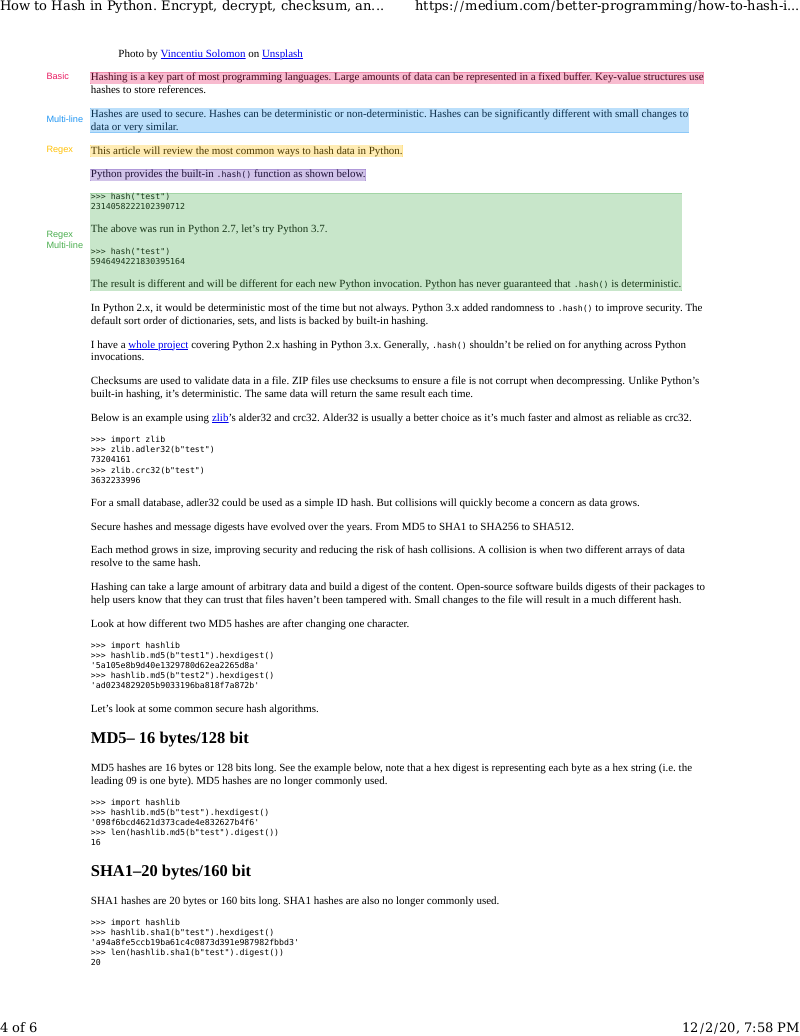

In [2]:
from pdf2image import convert_from_path
from IPython.display import display

from txtmarker.factory import Factory

# Renders first page of pdf file as image
def render(path):
  images = convert_from_path(path, size=(800, None), single_file=True)
  display(images[0])

# Define highlights
highlights = [
  ("Basic", "Hashing is a key part"),
  ("Multi-line", "Hashes are used to secure. Hashes can be deterministic or non-deterministic. Hashes can be significantly different with small changes to data or very similar."),
  ("Regex", "This article.*Python"),
  ("Regex Multi-line", "The above(.|\n)+is deterministic"),
  (None, "Python provides the built-in .hash()"),
]

highlighter = Factory.create("pdf")
highlighter.highlight("txtmarker/hash.pdf", "out.pdf", highlights)

render("out.pdf")

---
# Next

In part 2 of this series, we'll look at using Transformers to drive the highlighting process!